# Homework 2

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
df_select = df[["engine_displacement", "horsepower", "vehicle_weight", "model_year", "fuel_efficiency_mpg"]]
df_select

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

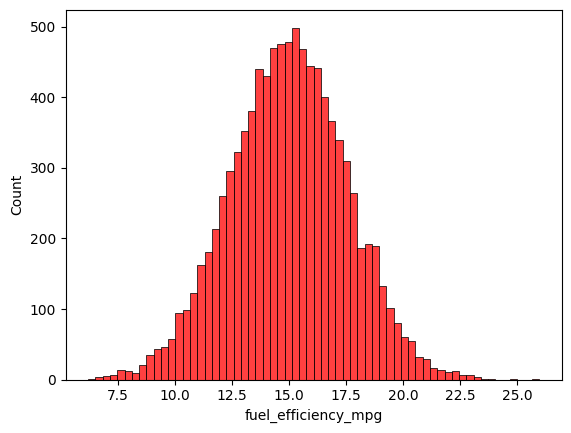

In [5]:
sns.histplot(df_select.fuel_efficiency_mpg, color="red")

# fuel efficiency miles per gallon is a perfect display of a normal distribution

In [7]:
df_select.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [8]:
df_select.horsepower.median()

np.float64(149.0)

In [15]:
np.random.seed(42)
length = len(df_select)

n_val = n_test = int((1/5 * length))
n_train = int(length - (2*n_val))

assert sum([n_train, n_val, n_test]) == length

n_train, n_val, n_test

(5824, 1940, 1940)

In [14]:
idx = np.arange(length)
np.random.shuffle(idx)

idx[:10]

array([ 483, 7506, 8795, 1688, 6217, 4562, 5885, 3746, 7109, 2698])

In [121]:
df_train = df_select.iloc[idx[:n_train]]
df_val = df_select.iloc[idx[n_train:n_train+n_test]]
df_test = df_select.iloc[idx[n_train+n_test:]]

In [33]:
True in list(df.horsepower.isnull().value_counts().index)

True

In [34]:

# all functions to be used

def prepare_X_fill_zero(df):
    df = df.copy()
    base = df.columns[df.columns != "fuel_efficiency_mpg"]
    df = df.fillna(0)
    return df[base].values

In [69]:

def prepare_X_fill_mean(df):
    df = df.copy()
    base = df.columns[df.columns != "fuel_efficiency_mpg"]
    df = df[base]
    for i in base:
        if True in list(df[i].isnull().value_counts().index):
            mean = df_train[i].mean()
            df[i] = df[i].fillna(mean)
    return df.values

In [39]:
def prepare_Y(df):
    return df.fuel_efficiency_mpg.values

In [94]:
# with z for filling mean values
X_train = prepare_X_fill_mean(df_train)
y_train = prepare_Y(df_train)

X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [77]:
ones = np.ones(X_train.shape[0])
ones, X_train.shape

(array([1., 1., 1., ..., 1., 1., 1.], shape=(5824,)), (5824, 4))

In [78]:
X = np.column_stack([ones, X_train])

In [79]:
XTX = X.T
XTX

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.20000000e+02, 1.60000000e+02, 2.30000000e+02, ...,
        2.10000000e+02, 2.50000000e+02, 2.10000000e+02],
       [1.44000000e+02, 1.41000000e+02, 1.55000000e+02, ...,
        1.52000000e+02, 1.54000000e+02, 1.52000000e+02],
       [2.53588759e+03, 2.74117048e+03, 2.47188024e+03, ...,
        2.50017569e+03, 2.25431324e+03, 2.43520361e+03],
       [2.00900000e+03, 2.01900000e+03, 2.01700000e+03, ...,
        2.02000000e+03, 2.00200000e+03, 2.00400000e+03]], shape=(5, 5824))

In [80]:
XG = XTX.dot(X)
XG

array([[5.82400000e+03, 1.16148000e+06, 8.70948704e+05, 1.75108631e+07,
        1.17146540e+07],
       [1.16148000e+06, 2.45926600e+08, 1.73604883e+08, 3.49103053e+09,
        2.33622676e+09],
       [8.70948704e+05, 1.73604883e+08, 1.34975178e+08, 2.61742080e+09,
        1.75188651e+09],
       [1.75108631e+07, 3.49103053e+09, 2.61742080e+09, 5.40927359e+10,
        3.52219266e+10],
       [1.17146540e+07, 2.33622676e+09, 1.75188651e+09, 3.52219266e+10,
        2.35636378e+10]])

In [81]:

XG_inv = np.linalg.inv(XG)
XG_inv

array([[ 1.56479226e+01, -2.83628781e-05,  2.09460768e-06,
        -3.21539945e-06, -7.77189647e-03],
       [-2.83628781e-05,  6.99911867e-08,  1.29155833e-09,
         5.83542616e-11,  6.97803996e-09],
       [ 2.09460768e-06,  1.29155833e-09,  2.11593818e-07,
         1.79945171e-10, -1.71697321e-08],
       [-3.21539945e-06,  5.83542616e-11,  1.79945171e-10,
         6.93136402e-10,  5.43299823e-10],
       [-7.77189647e-03,  6.97803997e-09, -1.71697321e-08,
         5.43299823e-10,  3.86361052e-06]])

In [82]:
w_out = XG_inv.dot(XTX).dot(y_train)
w_out[0], w_out[1:]

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [89]:

def linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T
    XG = XTX.dot(X)
    XG_inv = np.linalg.inv(XG)
    w_out = XG_inv.dot(XTX).dot(y)
    
    return w_out[0], w_out[1:]


In [90]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

In [95]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [96]:
w0, w = linear_regression(X_train, y_train)
w0, w

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [97]:
y_pred = w0 + X_train.dot(w)
y_pred

array([17.25910991, 16.19011261, 17.6924588 , ..., 17.51666431,
       18.77812427, 17.84593445], shape=(5824,))

In [98]:
rmse(y_train, y_pred)

np.float64(0.4624412137959964)

In [99]:
# using zero now
X_train = prepare_X_fill_zero(df_train)
y_train = prepare_Y(df_train)

w0, w = linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred)

np.float64(0.5202614265099076)

In [122]:
def linear_regression_reg(X, y, r=0):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T
    XG = XTX.dot(X)
    
    XG = XG + r * np.eye(XG.shape[0])
        
    XG_inv = np.linalg.inv(XG)
    w_out = XG_inv.dot(XTX).dot(y)
    
    return w_out[0], w_out[1:]


In [123]:
X_train = prepare_X_fill_mean(df_train)
y_train = prepare_Y(df_train)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_train.dot(w)

    score = rmse(y_train, y_pred)
    
    print(r, score)

0 0.4624412137959964
0.01 0.4626229085251904
0.1 0.4661214368145096
1 0.47112926676631467
5 0.4720194152216065
10 0.4721401918458205
100 0.47225084810651846


In [124]:
X_train = prepare_X_fill_zero(df_train)
y_train = prepare_Y(df_train)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_train.dot(w)

    score = rmse(y_train, y_pred)
    
    print(r, score, w0)

0 0.5202614265099076 28.82736547365895
0.01 0.5204218435630923 24.92683841981215
0.1 0.5235133030941316 11.239661084581073
1 0.5279470264734079 1.7315979411219746
5 0.528736166816663 0.3638075020482907
10 0.5288432624577701 0.18306246621686947
100 0.5289413891053159 0.01841801730688404


In [126]:
X_val = prepare_X_fill_zero(df_val)
y_val = prepare_Y(df_val)
for r in [0.01, 0.1, 1, 5, 10, 100]:
    
    w0, w = linear_regression_reg(X_val, y_val, r=r)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, score, w0)

0.01 0.5173132800749677 16.118120601786668
0.1 0.5207438829190313 4.170783528409819
1 0.5224016266041636 0.49579833334135015
5 0.5225964463747996 0.10085731914406962
10 0.5226214987140194 0.05054007474006013
100 0.5226441825442993 0.0050703023715381


In [127]:
X_val = prepare_X_fill_mean(df_val)
y_val = prepare_Y(df_val)
for r in [0.01, 0.1, 1, 5, 10, 100]:
    
    w0, w = linear_regression_reg(X_val, y_val, r=r)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, score, w0)

0.01 0.46380943773264144 16.731527544525854
0.1 0.46792801128299416 4.329678090854959
1 0.46991506783626286 0.514692459704993
5 0.4701484554557048 0.10470056156705675
10 0.4701784652992413 0.05246569218208563
100 0.4702056377719075 0.005263020711660127


In [144]:
class TestingRandomSeeds:
    
    def __init__(self, df):
        self.x_train, self.y_train = None, None
        self.df = df
        
    def linear_regression(self):
        self.setup()
        w0, w = linear_regression(self.x_train, self.y_train)
        return w0, w
    
    def setup_null(self):
        self.x_train = prepare_X_fill_zero(self.df)
        self.y_train = prepare_Y(self.df)
        
    def setup_mean(self):
        self.x_train = prepare_X_fill_mean(self.df)
        self.y_train = prepare_Y(self.df)
        
    def setup(self):
        assert type(self.x_train) != None
        assert type(self.y_train) != None
        
    def get_y_pred(self):
        w0, w = self.linear_regression()
        return w0 + self.x_train.dot(w)
    
    def get_rsme(self):
        self.setup()
        y_pred = self.get_y_pred()
        return rmse(self.y_train, y_pred)
    
    def evaluate(self, x_val, y_val):
        w0, w = self.linear_regression()
        y_pred = w0 + x_val.dot(w)
        return rmse(y_val, y_pred)

In [136]:
model = TestingRandomSeeds(df_train)

model.setup_mean()
model.get_rsme()

np.float64(0.4624412137959964)

In [147]:
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    
    df_train = df_select.iloc[idx[:n_train]]
    df_val = df_select.iloc[idx[n_train:n_train+n_test]]
    df_test = df_select.iloc[idx[n_train+n_test:]]
    
    x_val = prepare_X_fill_zero(df_val)
    y_val = prepare_Y(df_val)
    
    model = TestingRandomSeeds(df_train)
    model.setup_null()
    
    score = model.evaluate(x_val, y_val)
    std = np.round(np.std(score), 10)
    
    print(f" {seed}: {score} {std}")

 0: 0.5206531296294218 0.0
 1: 0.521338891285577 0.0
 2: 0.5228069974803171 0.0
 3: 0.515951674119676 0.0
 4: 0.5109129460053851 0.0
 5: 0.52834064601107 0.0
 6: 0.5313910658146311 0.0
 7: 0.5090670387381733 0.0
 8: 0.5147399129511132 0.0
 9: 0.5131865908224594 0.0


In [148]:
np.random.seed(9)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df_select.iloc[idx[:n_train]]
df_val = df_select.iloc[idx[n_train:n_train+n_test]]
df_test = df_select.iloc[idx[n_train+n_test:]]

x_val = prepare_X_fill_zero(df_test)
y_val = prepare_Y(df_test)

model = TestingRandomSeeds(df_train)
model.setup_null()

score = model.evaluate(x_val, y_val)
std = np.round(np.std(score), 10)

print(f" {seed}: {score} {std}")

 9: 0.5158284328943364 0.0
